In [10]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from scipy.ndimage import gaussian_filter


cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
batch_size = 32
img_height = 32
img_width = 32
#do validation split
#The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
normalization_layer = layers.Rescaling(1./255) #between 0 - 1
#create model
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

# Apply Gaussian blurring to each image in the dataset
train_images_smoothed = np.array([gaussian_filter(img, sigma=1) for img in train_images])
test_images_smoothed = np.array([gaussian_filter(img, sigma=1) for img in test_images])

num_classes = len(unique_labels)
base_model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (7, 7), strides=(1, 1), padding='valid', activation='relu'), #(7x7) kernel size
    layers.MaxPooling2D((2, 2), strides=(2, 2)), # 2x2 pool size, stride 2 -> move 2 moves every window
    layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'), # Same padding -> pad in a way to keep output dim same as input dim
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
])

base_model.summary()



Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,684 (686.27 KB)

 Trainable params: 175,684 (686.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 - 20s - 13ms/step - accuracy: 0.1050 - loss: 3.9467 - val_accuracy: 0.1627 - val_loss: 3.6137
Epoch 2/10
1563/1563 - 18s - 11ms/step - accuracy: 0.1980 - loss: 3.4007 - val_accuracy: 0.2182 - val_loss: 3.3106
Epoch 3/10
1563/1563 - 17s - 11ms/step - accuracy: 0.2370 - loss: 3.1749 - val_accuracy: 0.2385 - val_loss: 3.2227
Epoch 4/10
1563/1563 - 17s - 11ms/step - accuracy: 0.2661 - loss: 3.0169 - val_accuracy: 0.2533 - val_loss: 3.1478
Epoch 5/10
1563/1563 - 20s - 13ms/step - accuracy: 0.2870 - loss: 2.9058 - val_accuracy: 0.2559 - val_loss: 3.1030
Epoch 6/10
1563/1563 - 22s - 14ms/step - accuracy: 0.3049 - loss: 2.8106 - val_accuracy: 0.2568 - val_loss: 3.1195
Epoch 7/10
1563/1563 - 19s - 12ms/step - accuracy: 0.3214 - loss: 2.7295 - val_accuracy: 0.2700 - val_loss: 3.0453
Epoch 8/10
1563/1563 - 19s - 12ms/step - accuracy: 0.3354 - loss: 2.6547 - val_accuracy: 0.2678 - val_loss: 3.1114
Epoch 9/10
1563/1563 - 19s - 12ms/step - accuracy: 0.3486 - loss: 2.5851 - val_a

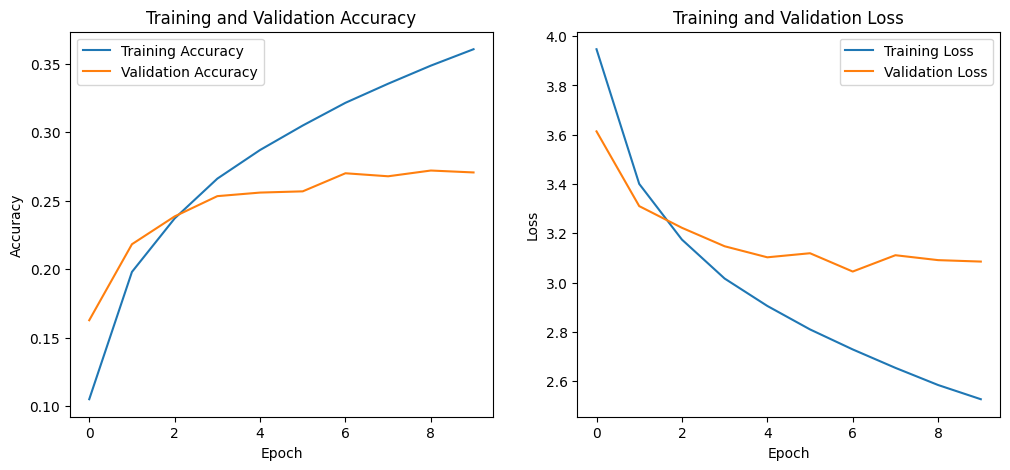

In [11]:
base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_filter = base_model.fit(
  train_images_smoothed,train_labels,
  validation_data=(test_images_smoothed, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)




# Evaluate the model
test_loss, test_accuracy = base_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
